In [59]:
##importing necessary packages
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.model_selection import GridSearchCV

## Understanding and analysing the data

In [3]:
## reading the data
data = pd.read_csv('vehicle.csv')
data.head(10)

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   
5          107          NaN                 106.0         172.0   
6           97         43.0                  73.0         173.0   
7           90         43.0                  66.0         157.0   
8           86         34.0                  62.0         140.0   
9           93         44.0                  98.0           NaN   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   
5                  50.0                        6          255.0   
6                  65.0                        6          153.0   
7                  65.0                        9          137.0   
8                  61.0                        7          122.0   
9                  62.0                       11          183.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   
5           26.0                    28.0                        169   
6           42.0                    19.0                        143   
7           48.0                    18.0                        146   
8           54.0                    17.0                        127   
9           36.0                    22.0                        146   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   
5            280.0              957.0                      264.0   
6            176.0              361.0                      172.0   
7            162.0              281.0                      164.0   
8            141.0              223.0                      112.0   
9            202.0              505.0                      152.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   
5                         85.0             5.0               9.0   
6                         66.0            13.0               1.0   
7                         67.0             3.0               3.0   
8                         64.0             2.0              14.0   
9                         64.0             4.0              14.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            1

In [4]:
data.info()
## totally there are 846 observations each with 18 features and 1 target
## also we can see some of the columns having observations less than 846 which means it has missing values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [5]:
print('no. of unique classes the target col has -',data['class'].unique())

no. of unique classes the target col has - ['van' 'car' 'bus']


In [6]:
## since the target column is in raw form lets convert it.
labelencoder = LabelEncoder()
data['class'] = labelencoder.fit_transform(data['class'])
data['class'].head()

0    2
1    2
2    1
3    2
4    0
Name: class, dtype: int32

In [7]:
## let check the missing values
data.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [8]:
## filling the null values by its corresponding mean(roundoff) 
for val in data.columns:
    data[val].fillna(round(data[val].mean()),inplace = True)

In [9]:
data.describe()
## In this description 50% is the median of the data, we can compare this with the mean to check for the outliers.
## Most of the features are having mean > median, i.e the distribution is right skewed -> outliers at right extreme.

compactness  circularity  distance_circularity  radius_ratio  \
count   846.000000   846.000000            846.000000    846.000000   
mean     93.678487    44.829787             82.109929    168.888889   
std       8.234474     6.133957             15.740904     33.400981   
min      73.000000    33.000000             40.000000    104.000000   
25%      87.000000    40.000000             70.000000    141.000000   
50%      93.000000    44.000000             80.000000    168.000000   
75%     100.000000    49.000000             98.000000    195.000000   
max     119.000000    59.000000            112.000000    333.000000   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
count            846.000000               846.000000     846.000000   
mean              61.679669                 8.567376     168.901891   
std                7.882134                 4.601217      33.195189   
min               47.000000                 2.000000     112.000000   
25%               57.000000                 7.000000     147.000000   
50%               61.000000                 8.000000     157.000000   
75%               65.000000                10.000000     198.000000   
max              138.000000                55.000000     265.000000   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
count     846.000000              846.000000                 846.000000   
mean       40.933806               20.583924                 147.998818   
std         7.811560                2.588445                  14.515652   
min        26.000000               17.000000                 118.000000   
25%        33.000000               19.000000                 137.000000   
50%        43.000000               20.000000                 146.000000   
75%        46.000000               23.000000                 159.000000   
max        61.000000               29.000000                 188.000000   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
count       846.000000         846.000000                 846.000000   
mean        188.632388         439.492908                 174.710402   
std          31.355203         176.457707                  32.546227   
min         130.000000         184.000000                 109.000000   
25%         167.000000         318.250000                 149.000000   
50%         179.000000         364.000000                 174.000000   
75%         217.000000         586.750000                 198.000000   
max         320.000000        1018.000000                 268.000000   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
count                   846.000000      846.000000        846.000000   
mean                     72.445626        6.361702         12.602837   
std                       7.468514        4.903244          8.930803   
min                      59.000000        0.000000          0.000000   
25%                      67.000000        2.000000          5.000000   
50%                      72.000000        6.000000         11.000000   
75%                      75.000000        9.000000         19.000000   
max                     135.000000       22.000000         41.000000   

       skewness_about.2  hollows_ratio       class  
count        846.000000     846.000000  846.000000  
mean         188.919622     195.632388    0.977541  
std            6.152167       7.438797    0.702130  
min          176.000000     181.000000    0.000000  
25%          184.000000     190.250000    0.000000  
50%          188.000000     197.000000    1.000000  
75%          193.000000     201.000000    1.000000  
max          206.000000     211.000000    2.000000

# Analysing the outliers

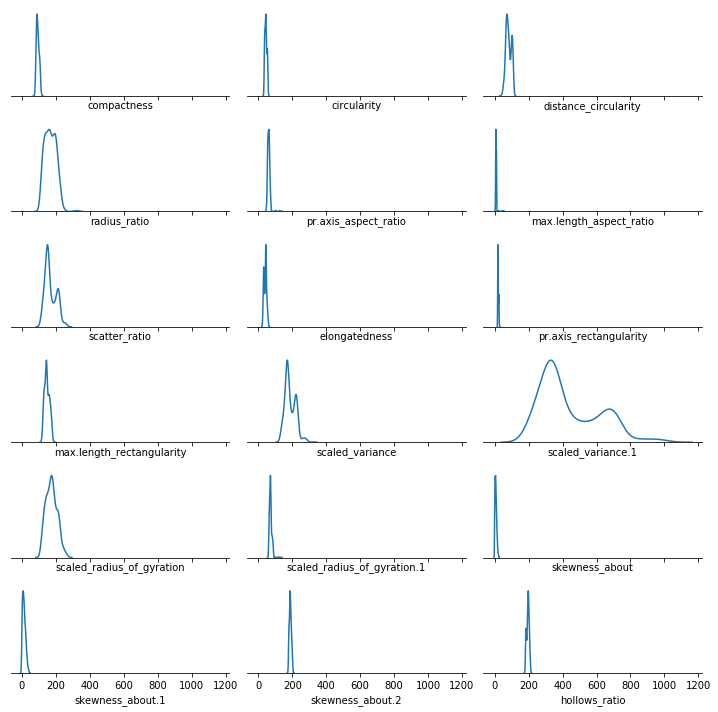

In [10]:
## visualizing the outliers of the features in thier corresponding distribution
f, axes = plt.subplots(6, 3, figsize=(10, 10), sharex=True)
sn.despine(left=True)

k = 0
for i in range(6):
    for j in range(3):
        sn.distplot(data[data.columns[k]],hist = False,axlabel = data.columns[k],ax = axes[i,j])
        k += 1
        
plt.setp(axes, yticks=[])
plt.tight_layout()

## we can see most of the features are heavily skewed to the right, insisting that it has outliers in higher scale region(right extreme)

In [11]:
outliers = {}
for val in data.columns:
    if val != 'class':
        data = data[np.abs(data[val]-data[val].median())<(3*data[val].std())]
        olrs = data[~(np.abs(data[val]-data[val].median())<(3*data[val].std()))]
        outliers = pd.DataFrame(olrs)

print('the data shape after treating - ',data.shape)    

the data shape after treating -  (796, 19)


# Visualising the data

C:\Users\Asus\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Asus\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Asus\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


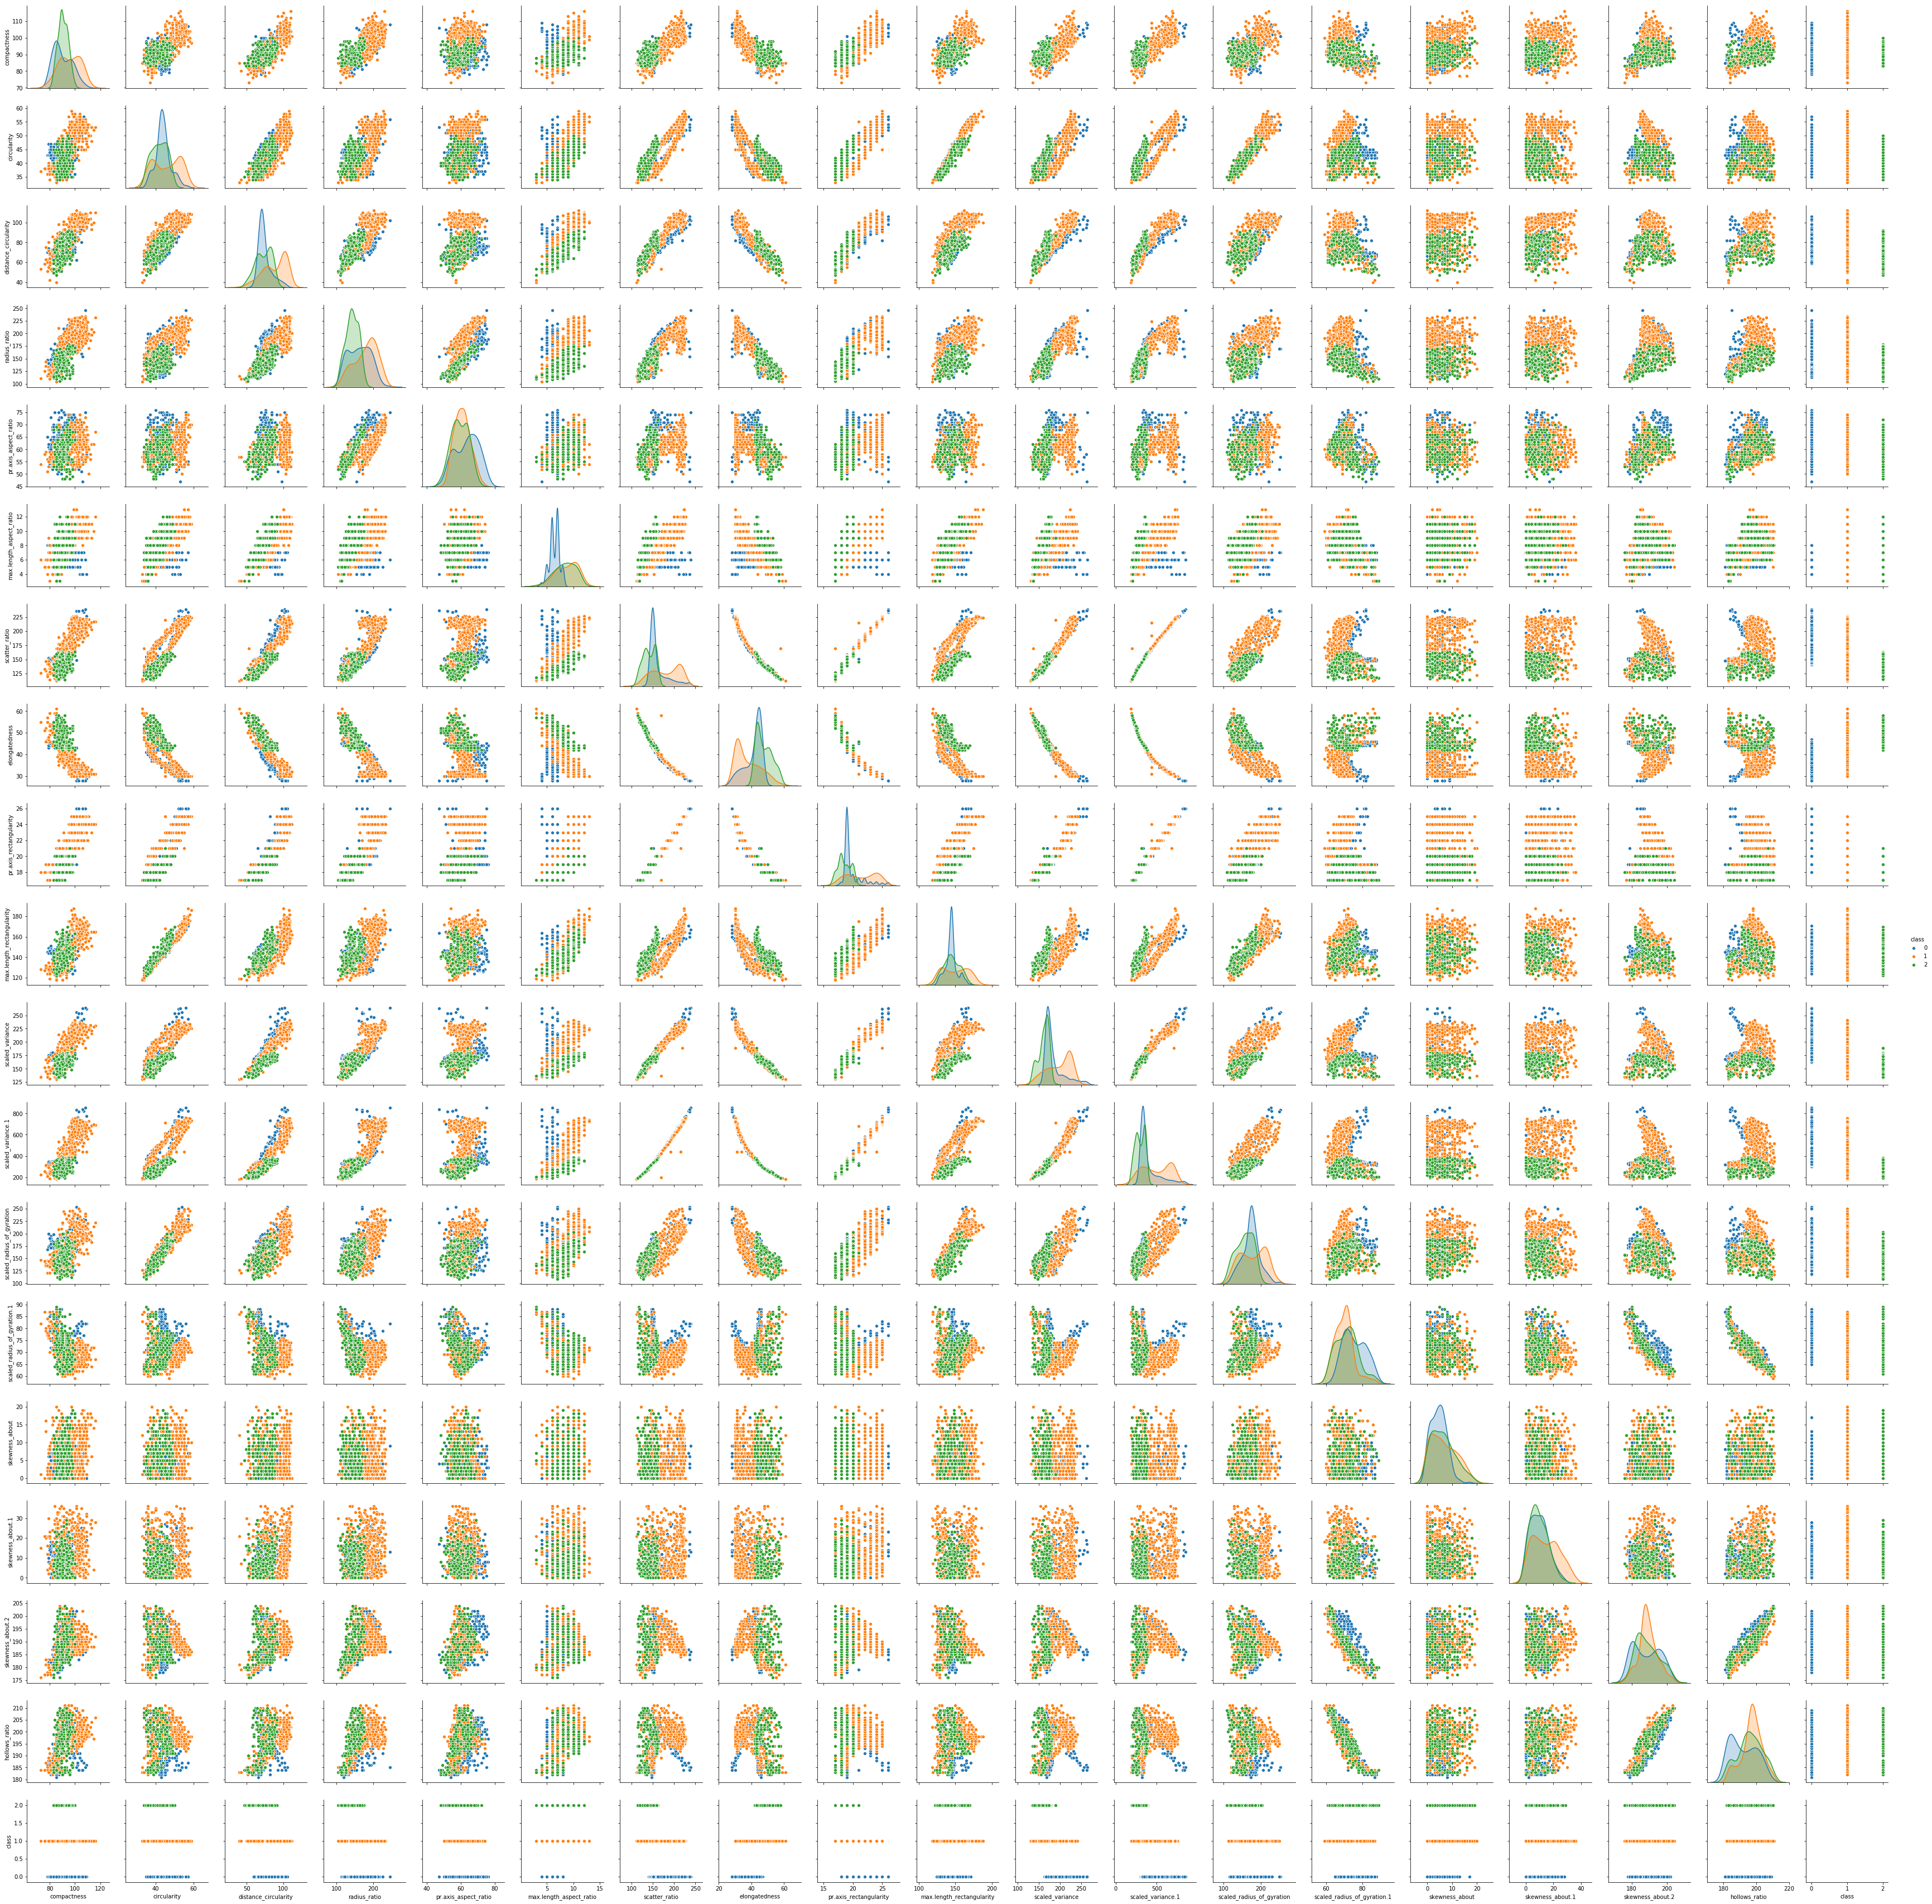

In [12]:
sn.pairplot(data,hue = 'class',diag_kind = 'kde')

In [13]:
corr = data.corr()
corr

compactness  circularity  distance_circularity  \
compactness                     1.000000     0.666575              0.780350   
circularity                     0.666575     1.000000              0.786218   
distance_circularity            0.780350     0.786218              1.000000   
radius_ratio                    0.757028     0.646393              0.815331   
pr.axis_aspect_ratio            0.260474     0.253161              0.296135   
max.length_aspect_ratio         0.563476     0.627990              0.731175   
scatter_ratio                   0.800380     0.847227              0.910941   
elongatedness                  -0.776030    -0.812866             -0.906847   
pr.axis_rectangularity          0.803262     0.847995              0.902529   
max.length_rectangularity       0.659133     0.964158              0.764674   
scaled_variance                 0.784800     0.811584              0.898650   
scaled_variance.1               0.807995     0.842354              0.901002   
scaled_radius_of_gyration       0.544121     0.933626              0.690354   
scaled_radius_of_gyration.1    -0.349841    -0.005078             -0.322681   
skewness_about                  0.201093     0.138144              0.096905   
skewness_about.1                0.162332    -0.020576              0.257475   
skewness_about.2                0.352722    -0.077971              0.175025   
hollows_ratio                   0.451031     0.103390              0.391909   
class                           0.021544    -0.117695             -0.024710   

                             radius_ratio  pr.axis_aspect_ratio  \
compactness                      0.757028              0.260474   
circularity                      0.646393              0.253161   
distance_circularity             0.815331              0.296135   
radius_ratio                     1.000000              0.692396   
pr.axis_aspect_ratio             0.692396              1.000000   
max.length_aspect_ratio          0.496675              0.130423   
scatter_ratio                    0.816275              0.284785   
elongatedness                   -0.857722             -0.369857   
pr.axis_rectangularity           0.793044              0.257083   
max.length_rectangularity        0.580821              0.192210   
scaled_variance                  0.832571              0.314746   
scaled_variance.1                0.813806              0.281476   
scaled_radius_of_gyration        0.555373              0.219650   
scaled_radius_of_gyration.1     -0.462881             -0.313536   
skewness_about                   0.040442             -0.053369   
skewness_about.1                 0.173082             -0.035763   
skewness_about.2                 0.449320              0.400235   
hollows_ratio                    0.553198              0.413152   
class                           -0.211713             -0.253577   

                             max.length_aspect_ratio  scatter_ratio  \
compactness                                 0.563476       0.800380   
circularity                                 0.627990       0.847227   
distance_circularity                        0.731175       0.910941   
radius_ratio                                0.496675       0.816275   
pr.axis_aspect_ratio                        0.130423       0.284785   
max.length_aspect_ratio                     1.000000       0.604979   
scatter_ratio                               0.604979       1.000000   
elongatedness                              -0.578185      -0.973513   
pr.axis_rectangularity                      0.612025       0.987697   
max.length_rectangularity                   0.708805       0.805419   
scaled_variance                             0.536371       0.976057   
scaled_variance.1                           0.580467       0.993825   
scaled_radius_of_gyration                   0.494864       0.770830   
scaled_radius_of_gyration.1                -0.315883      -0.117089   
skewness_about                            

$ The feature 'circularity' is strongly corelated with 'scaled_radius_of_gyration' and 'max.length_rectangularity', so inorder to drop anyone of the feature lets check its correlation with target and lets keep the feature with higher score. We found that 'scaled_radius_of_gyration' has higher score than 'max.length_rectangularity',hence drop 'max.length_rectangularity'.

$ Some of the features are almost independent with each other, this is a good sign since more independent the features are more good the model will be.

$ The feature 'pr.axis_aspect_ratio','max.length_aspect_ratio' is a good feature since its almost independent with all the features.

$ The features 'scatter ratio' is almost same as 'scaled_variance.1', since both of the features are explaining the same thing lets drop anyone of it, 'scaled_variance.1' has less corr score with target hence drop lets drop it.

$ The features 'max.length_aspect_rati' and 'elongatedness' are good for this classification since they are highly dependent on target when compared to other features.

$ Using the same concetps above we can analyse each features and can decide on which one to select, but when the data is in higher dimension(more features) its hard to manualy anlyse using the data plot. We can use PCA inorder to solve this kind of situation, it helps to analyse higher dimensional data and helps to reduce the dimension.

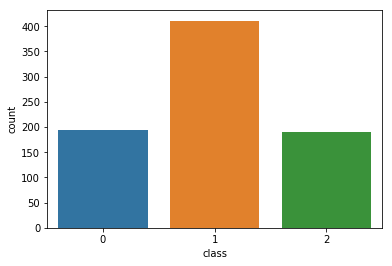

In [14]:
## the distribution of target class is slightly imbalanced
sn.countplot(x = 'class',data = data)

# PCA

In [18]:
## splitting the data into train and test
X = data.drop(labels = 'class',axis = 1)
Y = data['class']

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3,random_state = 1)

In [19]:
## standardising the data for pca
sc = StandardScaler()
x_train_std = sc.fit_transform(x_train)
 
pca = PCA(n_components = 18)
pca.fit(x_train_std)

C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


PCA(copy=True, iterated_power='auto', n_components=18, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [32]:
## 'covr' is the data plotted in principle component's dimension
covr = pd.DataFrame(pca.fit_transform(x_train_std))
## getting the covariance matrix
cov_mat = np.cov(covr.T)
print(cov_mat)
## we can see that only diagonal elements have considerable values and rest of them are nearly 0
##(this very small covariance is due to some noise in the data)

[[ 1.00426454e+01  1.15015910e-15  5.11181824e-17 -1.02236365e-16
   2.84344890e-16  4.05750573e-16  4.97204196e-16  7.57188077e-16
   4.15335232e-17 -2.55590912e-17  7.18849440e-17  1.43769888e-17
   9.58465921e-18 -7.18849440e-18  1.59744320e-18  6.38977280e-18
   3.19488640e-18  1.49760300e-17]
 [ 1.15015910e-15  3.22745541e+00 -4.00958243e-16  1.91693184e-17
   5.75079552e-17 -3.25878413e-16  9.26517057e-17 -1.21405683e-16
   1.68542738e-17 -4.21325644e-17 -6.38977280e-18  2.53594108e-17
   4.31309664e-17 -2.55590912e-17 -6.98881400e-19  9.58465921e-18
   3.19488640e-18 -3.99360800e-19]
 [ 5.11181824e-17 -4.00958243e-16  1.23802275e+00  1.24600570e-15
  -1.98082957e-16  1.21405683e-16 -1.00638922e-16 -7.98721600e-19
  -9.82427569e-17  6.86900576e-17  5.51117904e-17 -1.11821024e-17
  -1.03833808e-17 -8.38657680e-18 -1.72723546e-17 -9.98402001e-18
  -1.89696380e-18  2.19648440e-18]
 [-1.02236365e-16  1.91693184e-17  1.24600570e-15  1.17071761e+00
   3.19488640e-18  1.22304245e-17 -7.

In [37]:
## the principle components
pca.components_.shape
## so totally we have 18 principle components ,each of these compaonents are linear combination of those 18 features in real data.

(18, 18)

In [45]:
## variance explained by each components
exp_var = pca.explained_variance_


tot = sum(exp_var)
exp_var_percent = [( i /tot ) * 100 for i in exp_var]

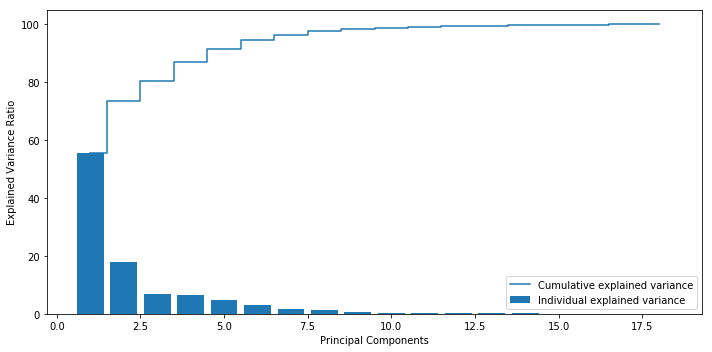

In [48]:
## making the elbow plot to identfiy right number of components
cum_var_exp = np.cumsum(exp_var_percent)

plt.figure(figsize=(10 , 5))
plt.bar(range(1, exp_var.size + 1), exp_var_percent, alpha = 1, align = 'center', label = 'Individual explained variance')
plt.step(range(1, exp_var.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

## since we are looking for  more than 95% explained variance, 7 priciple components fits into this condtion 
##and we reduce the dimension to 7

In [53]:
## reducing the dimension to 7 from 18
x_train_red = pd.DataFrame(PCA(n_components = 7).fit_transform(x_train_std))
## transforming the test data
x_test_std = sc.fit_transform(x_test)
x_test_red = pd.DataFrame(PCA(n_components = 7).fit_transform(x_test_std))

C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


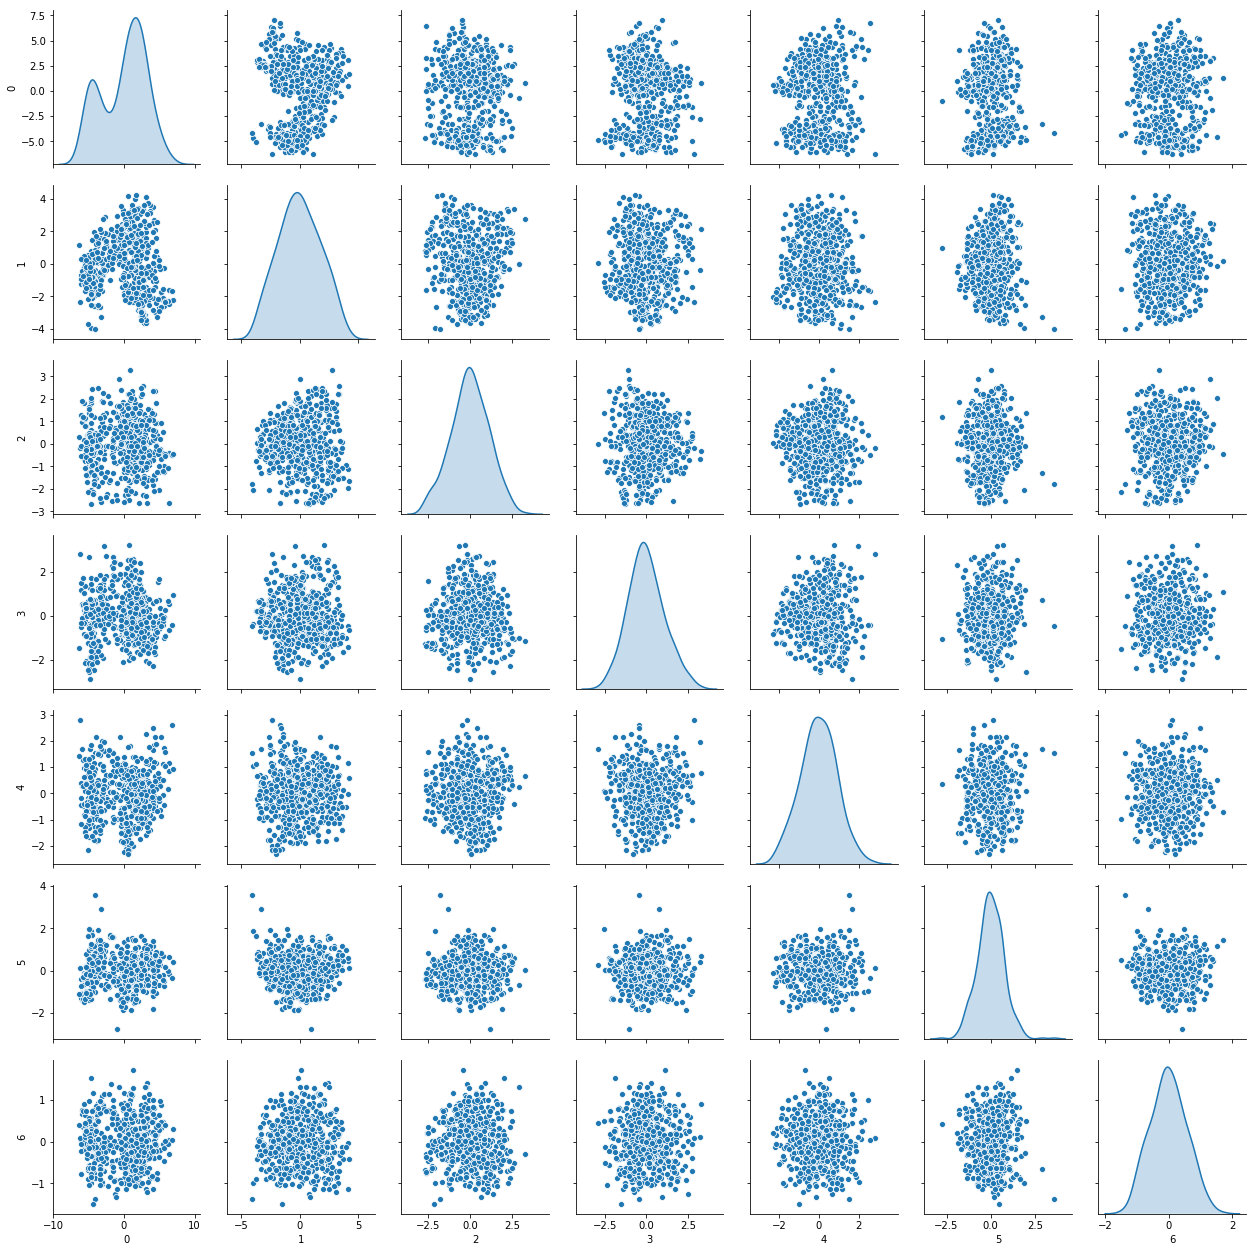

In [54]:
sn.pairplot(x_train_red,diag_kind = 'kde')
## we can see that most of the fatures are almost independent with each other, 95% information are provided by these features alone
## Also these features are not same as the real features before PCA, each of these are combinations of all those real features.

# Building a svm classifier 

In [61]:
# defining parameter range 
param_grid = {'C': [0.01, 0.05, 0.5, 1],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear','rbf']}  
## 10-fold cross validation  
grid = GridSearchCV(SVC(), param_grid,cv = 10, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(x_train_red, y_train) 

Fitting 10 folds for each of 40 candidates, totalling 400 fits
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV]  C=0.01, gamma=1, kernel=linear, score=0.7678571428571429, total=   0.0s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ...... C=0.01, gamma=1, kernel=linear, score=0.875, total=   0.0s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV]  C=0.01, gamma=1, kernel=linear, score=0.8214285714285714, total=   0.0s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV]  C=0.01, gamma=1, kernel=linear, score=0.9464285714285714, total=   0.0s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV]  C=0.01, gamma=1, kernel=linear, score=0.9107142857142857, total=   0.0s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ...... C=0.01, gamma=1, kernel=linear, score=0.875, total=   0.0s
[CV] C=0.01, gamma=1, kernel=linear .....................

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  C=0.01, gamma=1, kernel=rbf, score=0.5178571428571429, total=   0.0s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV]  C=0.01, gamma=1, kernel=rbf, score=0.5178571428571429, total=   0.0s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV]  C=0.01, gamma=1, kernel=rbf, score=0.5178571428571429, total=   0.0s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV]  C=0.01, gamma=1, kernel=rbf, score=0.5178571428571429, total=   0.0s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV]  C=0.01, gamma=1, kernel=rbf, score=0.509090909090909, total=   0.0s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV]  C=0.01, gamma=1, kernel=rbf, score=0.5185185185185185, total=   0.0s
[CV] C=0.01, gamma=0.1, kernel=linear ................................
[CV]  C=0.01, gamma=0.1, kernel=linear, score=0.7678571428571429, total=   0.0s
[CV] C=0.01, gamma=0.1, kernel=linear .......

[CV]  C=0.01, gamma=0.001, kernel=rbf, score=0.5178571428571429, total=   0.0s
[CV] C=0.01, gamma=0.001, kernel=rbf .................................
[CV]  C=0.01, gamma=0.001, kernel=rbf, score=0.509090909090909, total=   0.0s
[CV] C=0.01, gamma=0.001, kernel=rbf .................................
[CV]  C=0.01, gamma=0.001, kernel=rbf, score=0.5185185185185185, total=   0.0s
[CV] C=0.01, gamma=0.0001, kernel=linear .............................
[CV]  C=0.01, gamma=0.0001, kernel=linear, score=0.7678571428571429, total=   0.0s
[CV] C=0.01, gamma=0.0001, kernel=linear .............................
[CV] . C=0.01, gamma=0.0001, kernel=linear, score=0.875, total=   0.0s
[CV] C=0.01, gamma=0.0001, kernel=linear .............................
[CV]  C=0.01, gamma=0.0001, kernel=linear, score=0.8214285714285714, total=   0.0s
[CV] C=0.01, gamma=0.0001, kernel=linear .............................
[CV]  C=0.01, gamma=0.0001, kernel=linear, score=0.9464285714285714, total=   0.0s
[CV] C=0.01, gamma

[CV]  C=0.05, gamma=0.01, kernel=linear, score=0.7678571428571429, total=   0.0s
[CV] C=0.05, gamma=0.01, kernel=linear ...............................
[CV]  C=0.05, gamma=0.01, kernel=linear, score=0.8571428571428571, total=   0.0s
[CV] C=0.05, gamma=0.01, kernel=linear ...............................
[CV]  C=0.05, gamma=0.01, kernel=linear, score=0.8392857142857143, total=   0.0s
[CV] C=0.05, gamma=0.01, kernel=linear ...............................
[CV]  C=0.05, gamma=0.01, kernel=linear, score=0.9464285714285714, total=   0.0s
[CV] C=0.05, gamma=0.01, kernel=linear ...............................
[CV]  C=0.05, gamma=0.01, kernel=linear, score=0.9464285714285714, total=   0.0s
[CV] C=0.05, gamma=0.01, kernel=linear ...............................
[CV]  C=0.05, gamma=0.01, kernel=linear, score=0.8928571428571429, total=   0.0s
[CV] C=0.05, gamma=0.01, kernel=linear ...............................
[CV]  C=0.05, gamma=0.01, kernel=linear, score=0.8571428571428571, total=   0.0s
[CV] C=

[CV] .......... C=0.5, gamma=1, kernel=rbf, score=0.625, total=   0.0s
[CV] C=0.5, gamma=1, kernel=rbf ......................................
[CV]  C=0.5, gamma=1, kernel=rbf, score=0.6964285714285714, total=   0.0s
[CV] C=0.5, gamma=1, kernel=rbf ......................................
[CV]  C=0.5, gamma=1, kernel=rbf, score=0.6428571428571429, total=   0.0s
[CV] C=0.5, gamma=1, kernel=rbf ......................................
[CV]  C=0.5, gamma=1, kernel=rbf, score=0.7142857142857143, total=   0.0s
[CV] C=0.5, gamma=1, kernel=rbf ......................................
[CV]  C=0.5, gamma=1, kernel=rbf, score=0.6607142857142857, total=   0.0s
[CV] C=0.5, gamma=1, kernel=rbf ......................................
[CV]  C=0.5, gamma=1, kernel=rbf, score=0.6607142857142857, total=   0.0s
[CV] C=0.5, gamma=1, kernel=rbf ......................................
[CV]  C=0.5, gamma=1, kernel=rbf, score=0.5892857142857143, total=   0.0s
[CV] C=0.5, gamma=1, kernel=rbf ...........................

[CV]  C=0.5, gamma=0.001, kernel=rbf, score=0.5178571428571429, total=   0.0s
[CV] C=0.5, gamma=0.001, kernel=rbf ..................................
[CV]  C=0.5, gamma=0.001, kernel=rbf, score=0.5178571428571429, total=   0.0s
[CV] C=0.5, gamma=0.001, kernel=rbf ..................................
[CV]  C=0.5, gamma=0.001, kernel=rbf, score=0.509090909090909, total=   0.0s
[CV] C=0.5, gamma=0.001, kernel=rbf ..................................
[CV]  C=0.5, gamma=0.001, kernel=rbf, score=0.5185185185185185, total=   0.0s
[CV] C=0.5, gamma=0.0001, kernel=linear ..............................
[CV] ... C=0.5, gamma=0.0001, kernel=linear, score=0.75, total=   0.0s
[CV] C=0.5, gamma=0.0001, kernel=linear ..............................
[CV]  C=0.5, gamma=0.0001, kernel=linear, score=0.8571428571428571, total=   0.0s
[CV] C=0.5, gamma=0.0001, kernel=linear ..............................
[CV]  C=0.5, gamma=0.0001, kernel=linear, score=0.9107142857142857, total=   0.0s
[CV] C=0.5, gamma=0.0001, ke

[CV]  C=1, gamma=0.1, kernel=rbf, score=0.9818181818181818, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV]  C=1, gamma=0.1, kernel=rbf, score=0.8888888888888888, total=   0.0s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV]  C=1, gamma=0.01, kernel=linear, score=0.7678571428571429, total=   0.0s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV]  C=1, gamma=0.01, kernel=linear, score=0.8571428571428571, total=   0.0s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV]  C=1, gamma=0.01, kernel=linear, score=0.9285714285714286, total=   0.0s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV]  C=1, gamma=0.01, kernel=linear, score=0.9285714285714286, total=   0.0s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV]  C=1, gamma=0.01, kernel=linear, score=0.9285714285714286, total=   0.0s
[CV] C=1, gamma=0.01, kernel=linear 

[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    4.9s finished


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.01, 0.05, 0.5, 1], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['linear', 'rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [62]:
# best parameter after tuning 
print(grid.best_params_) 
  
# how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [69]:
grid_predictions = grid.predict(x_test_red) 

print('the train and test accuracies are  -',grid.score(x_train_red,y_train),grid.score(x_test_red,y_test))
# classification report 
print(classification_report(y_test, grid_predictions))

the train and test accuracies are  - 0.9461400359066428 0.4686192468619247
              precision    recall  f1-score   support

           0       0.47      0.16      0.24        55
           1       0.49      0.67      0.57       123
           2       0.39      0.34      0.37        61

   micro avg       0.47      0.47      0.47       239
   macro avg       0.45      0.39      0.39       239
weighted avg       0.46      0.47      0.44       239



In [ ]:
## Since we are having multi-class classification(3 classes) ,the algorithm classifies it by one vs all method,i.e
## for each class it consider a binary classification
## First it makes binary classification for class '0' against all then class '1' against all then class '2' against all.
## So totally it makes 3(equal to no.of classes) binary classification, hence each class will be having its own scores.